In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('/content/jm1.csv')

In [33]:
features = data.drop('defects', axis=1)
target = data['defects']

In [35]:
print(features.columns)

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
      dtype='object')


In [36]:
features = data[['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']]
target = data['defects']

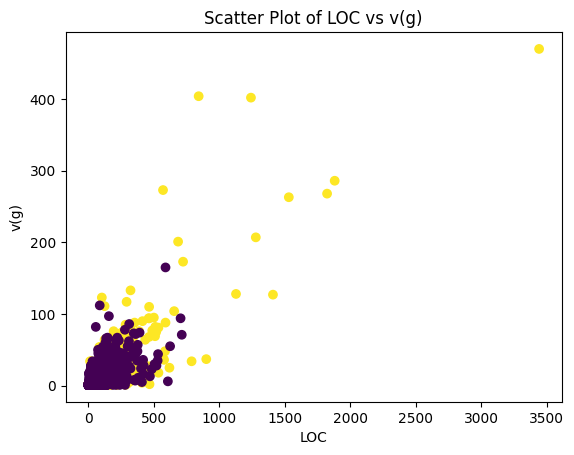

In [37]:
plt.scatter(features['loc'], features['v(g)'], c=target)
plt.xlabel('LOC')
plt.ylabel('v(g)')
plt.title('Scatter Plot of LOC vs v(g)')
plt.show()

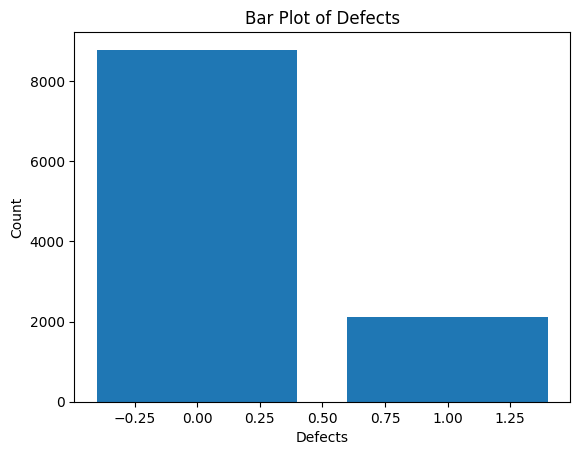

In [38]:
target_counts = target.value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Defects')
plt.ylabel('Count')
plt.title('Bar Plot of Defects')
plt.show()

In [40]:
import seaborn as sns

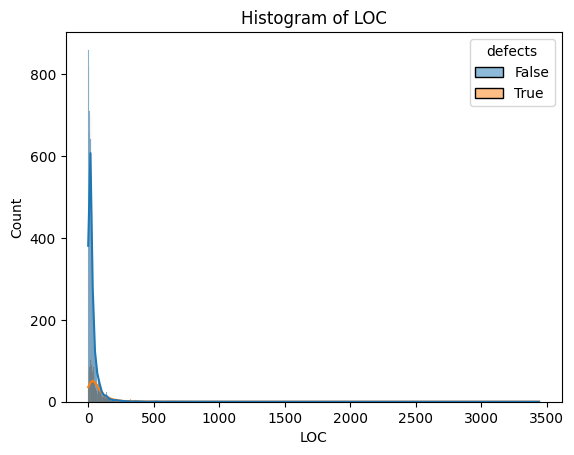

In [41]:
sns.histplot(data=data, x='loc', hue=target, kde=True)
plt.xlabel('LOC')
plt.ylabel('Count')
plt.title('Histogram of LOC')
plt.show()

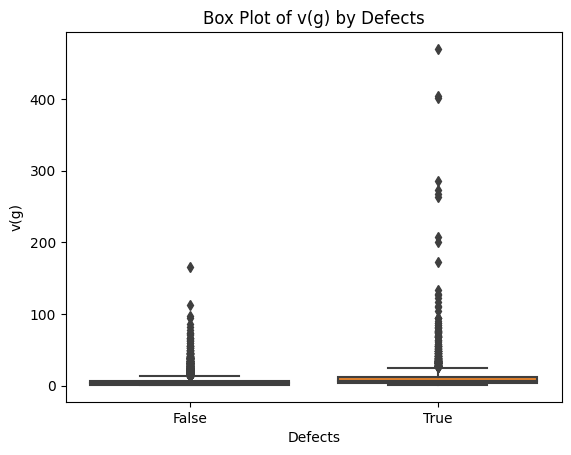

In [44]:
data['Defects'] = target  # Create a new column to represent the categories
sns.boxplot(data=data, y='v(g)', x='Defects')
plt.xlabel('Defects')
plt.ylabel('v(g)')
plt.title('Box Plot of v(g) by Defects')
plt.show()

<ipython-input-43-d0767786d77a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = features.corr()


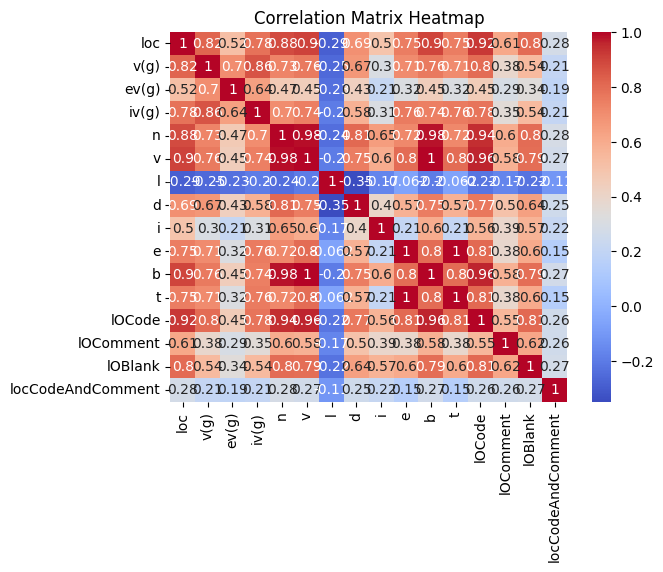

In [43]:
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
features.replace('?', -1, inplace=True)

In [ ]:
features = features.astype(float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", auc_roc)

Accuracy: 0.8139641708773542
Precision: 0.5376344086021505
Recall: 0.2386634844868735
F1 Score: 0.33057851239669417
AUC-ROC Score: 0.5948721290466222


In [ ]:
training_feature_names = X_train.columns

In [ ]:
new_data = data[training_feature_names]

In [ ]:
new_data.replace('?', -1, inplace=True)
new_data = new_data.astype(float)

<ipython-input-22-97f7f79d862d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace('?', -1, inplace=True)


In [ ]:
new_data_predictions = clf.predict(new_data)

In [ ]:
print("Predictions for new data:")
print(new_data_predictions)

Predictions for new data:
[ True  True  True ... False False False]
